# IRIS FLOWERS CLASSIFICATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iris = pd.read_csv("IRIS.csv")

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
def check_data(iris,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(iris.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(iris.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(iris.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(iris.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(iris.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(iris.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    
check_data(iris)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
--------------------     Data Shape     --------------------
(150, 5)

--------------------  The First 5 Data  --------------------
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa


In [9]:
df0 = iris[:50]
df1 = iris[50:100]
df2 = iris[100:]

In [25]:
iris.shape


(150, 6)

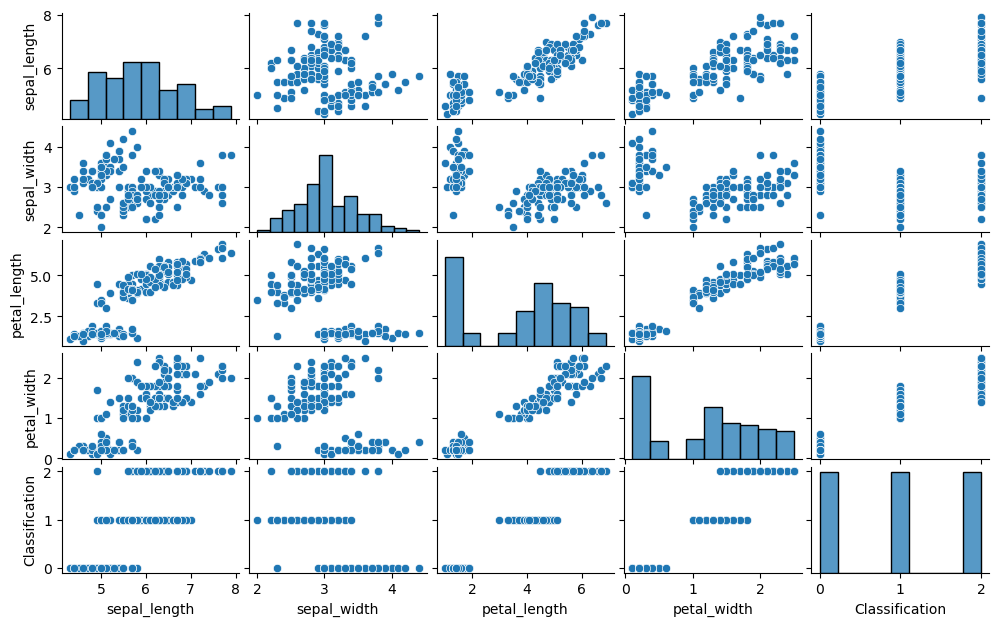

In [26]:
fig1=sns.pairplot(iris)
fig1.fig.set_figheight(6)
fig1.fig.set_figwidth(10)
plt.show()

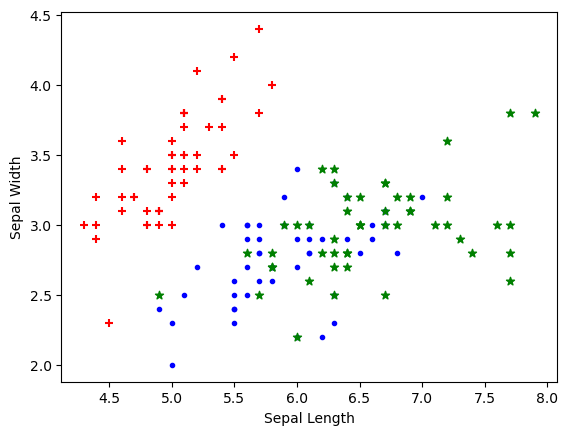

In [10]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal_length'], df0['sepal_width'], color = "red", marker="+")
plt.scatter(df1['sepal_length'], df1['sepal_width'], color = "blue", marker=".")
plt.scatter(df2['sepal_length'], df2['sepal_width'], color = "green", marker="*")

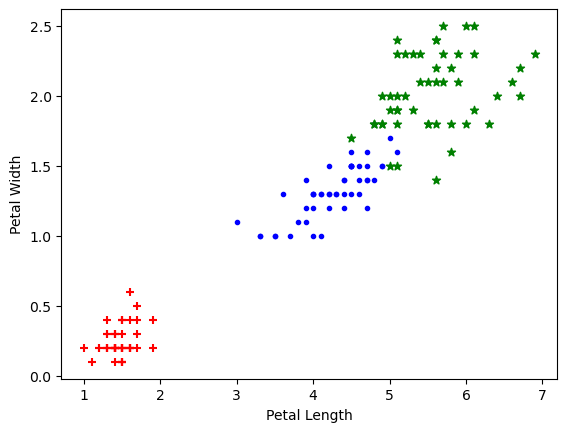

In [11]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal_length'], df0['petal_width'], color = "red", marker="+")
plt.scatter(df1['petal_length'], df1['petal_width'], color = "blue", marker=".")
plt.scatter(df2['petal_length'], df2['petal_width'], color = "green", marker="*")

In [12]:
print(iris['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
mappings = {'Iris-setosa':0 , 'Iris-versicolor':1 , 'Iris-virginica':2 }
iris['Classification'] = iris['species'].map(mappings)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['Classification']

In [16]:
x_train, x_test , y_train , y_test = train_test_split(x,y,train_size=.3)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
knn.score(x_test, y_test)

0.9238095238095239

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[32,  0,  0],
       [ 0, 33,  5],
       [ 0,  3, 32]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

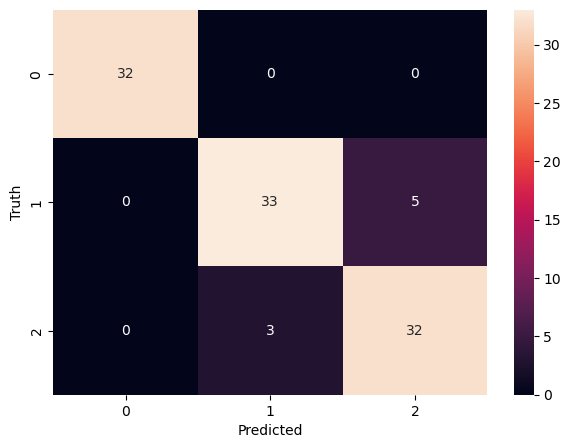

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.92      0.87      0.89        38
           2       0.86      0.91      0.89        35

    accuracy                           0.92       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.92      0.92      0.92       105

